In [2]:


import sys
sys.path.append('../')


from rasterio.plot import show

%matplotlib inline

## Explore Shapefiles

In [5]:
import os
import geopandas as gpd
from config import raw_data_dir, interim_data_dir

def read_shapefile(dataset):
    fp = os.path.join(raw_data_dir, '{}/{}.shp'.format(dataset, dataset))
    sh_df = gpd.read_file(fp)
    return sh_df

### Train

In [8]:
shp_df = read_shapefile('train')
shp_df.head()

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
0,1,0.915905,3,8,POLYGON ((2467881.175041331 -3352032.059296422...
1,2,2.064410,3,6,"POLYGON ((2468428.90623293 -3351993.17305059, ..."
2,3,1.080300,3,8,POLYGON ((2468333.745293362 -3352058.485056543...
3,4,1.316190,3,8,POLYGON ((2468607.857733211 -3352012.337531495...
4,7,5.529220,3,8,"POLYGON ((2468646.08520868 -3351706.201920062,..."


In [10]:
shp_df.loc[shp_df.geometry.isna()]

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
800,1170,0.0,0,8,None
1162,1685,0.0,0,8,None
2402,3472,0.0,0,6,None


### Test

In [11]:
shp_df = read_shapefile('test')
shp_df.head()

,Field_Id,Area,Subregion,geometry
0,5,1.322590,3,POLYGON ((2468454.792855258 -3351779.658448273...
1,6,0.955864,3,POLYGON ((2468670.690483304 -3351827.266046685...
2,10,11.509800,3,"POLYGON ((2468365.44901751 -3351541.136415984,..."
3,18,2.697520,3,POLYGON ((2437080.101649587 -3334938.835198846...
4,23,4.238030,3,POLYGON ((2437320.480601263 -3334595.737163622...


In [12]:
shp_df.loc[shp_df.geometry.isna()]

,Field_Id,Area,Subregion,geometry


In [3]:
img_path = '../data/interim/images/2017-01-01/B01_JEP.jp2'

train_fp = os.path.join(raw_data_dir,'train/train.shp')
train_df = gpd.read_file(train_fp)

In [4]:
train_df.loc[train_df.geometry.isna()]

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
800,1170,0.0,0,8,None
1162,1685,0.0,0,8,None
2402,3472,0.0,0,6,None


In [5]:
train_df.Crop_Id_Ne.value_counts()

8    943
4    536
5    283
7    267
6    147
1    142
3     95
9     77
2      7
Name: Crop_Id_Ne, dtype: int64

In [6]:
train_df.Subregion.value_counts()

3    955
6    409
5    356
2    337
4    209
1    175
7     43
0     13
Name: Subregion, dtype: int64

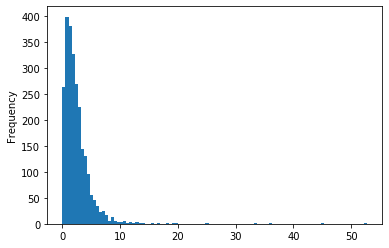

In [8]:
train_df.Area.plot.hist(bins=100)

In [10]:
train_df.loc[train_df.Area > 10].sort_values(by='Area')

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
1215,1767,10.1192,6,5,POLYGON ((2402855.049564731 -3279794.539556627...
878,1288,10.1692,1,8,POLYGON ((2450206.672831722 -3340747.316154426...
2386,3452,10.5334,5,6,POLYGON ((2420940.600639213 -3293891.554906887...
2049,2992,10.5486,6,7,POLYGON ((2386877.016191669 -3281742.144854352...
2088,3041,10.6050,6,4,POLYGON ((2388847.105161164 -3279518.043150201...
97,142,10.9537,1,5,POLYGON ((2458867.480669721 -3337068.290650873...
1014,1474,11.0283,3,4,POLYGON ((2439751.477072646 -3333587.533483494...
2360,3419,11.0622,3,6,"POLYGON ((2458711.771051068 -3340050.62663205,..."
2241,3237,11.1392,3,7,POLYGON ((2446840.340732466 -3336708.749360386...
1015,1475,11.4926,3,4,POLYGON ((2440122.177175011 -3333436.831555021...
